# Machine Translation with Opus

## Data

In [1]:
# !pip install transformers, sentencepiece, datasets

In [2]:
from datasets import load_dataset

C:\Users\emili\Desktop\transformers_course\transformers-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
lan_1 = "en"
lan_2 = "it"

In [4]:
data = load_dataset("kde4", lang1=lan_1, lang2=lan_2, trust_remote_code=True)
data

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 220566
    })
})

In [5]:
# Selezioniamo 10000 campioni random
small = data["train"].shuffle(seed=42).select(range(1000))

In [6]:
split = small.train_test_split(seed=42, test_size=0.3)

In [7]:
split

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 700
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 300
    })
})

## Tokenizer

Il tokenizer qui ha una funzione diversa. Oltre a dover tokenizzare l'input, deve tokenizzare anche il target, in quanto abbiamo due sequenze di parole. Una cosa importante è che il tokenizer usa due API diverse per tokenizzare il primo linguaggio ed il secondo, per questo motivo è molto importante selezionare il checkpoint ed assicurarsi che si usino correttamente le api.

Inoltre, essendo basato su un modello diverso, usa token speciali e modalità di tokenizzazione differenti rispetto a BERT.

Per tokenizzare il secondo linguaggio usare: tokenizer(text_target="Testo inserito")

In [8]:
from transformers import AutoTokenizer

In [9]:
checkpoint = f"Helsinki-nlp/opus-mt-{lan_1}-{lan_2}"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

C:\Users\emili\Desktop\transformers_course\transformers-env\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
C:\Users\emili\Desktop\transformers_course\transformers-env\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [10]:
example_idx = 100
en = split["train"][example_idx]["translation"][lan_1]
it = split["train"][example_idx]["translation"][lan_2]
en, it

('Using the metadata plugin Import function allows to copy data from one image to another. Select the image you want ot copy to in the main application. Then call the import function, which will open a file browser where you select the source image (the one you want to copy the metadata from). Click OK and the data will be copied over.',
 "Usare la funzione Importa del plugin per i dati aggiuntivi permette di copiare dati da un' immagine all' altra. Seleziona l' immagine che vuoi copiare nell' applicazione principale. Quindi, chiama la funzione di importazione, che aprirà un browser di file dal quale potrai selezionare l' immagine sorgente (quella da cui vuoi copiare i dati aggiuntivi). Fai clic su OK e i dati saranno copiati.")

In [11]:
inputs = tokenizer(en)
targets = tokenizer(text_target=it)
inputs, targets

({'input_ids': [5285, 68, 4, 38872, 8985, 124, 12241, 3942, 2899, 11, 6272, 381, 67, 133, 3149, 11, 928, 2, 7027, 4, 3149, 29, 342, 28014, 6272, 11, 7, 4, 1165, 1082, 2, 1703, 1125, 4, 4619, 3942, 3, 101, 105, 1009, 9, 396, 2346, 3157, 122, 328, 29, 5190, 4, 4017, 3149, 25, 660, 133, 29, 342, 11, 6272, 4, 38872, 67, 140, 93, 3476, 16, 3297, 13, 4, 381, 105, 44, 475, 1162, 102, 362, 2, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 {'input_ids': [9666, 51, 15, 2376, 12241, 34, 26, 228, 1234, 176, 124, 20, 39, 589, 12332, 2248, 6, 6616, 51, 589, 52, 23, 5, 6520, 57, 5, 5183, 2, 136, 125, 4374, 35, 5, 6520, 17, 1524, 6616, 51, 272, 5, 1843, 1839, 2, 1433, 3, 2577, 15, 2376, 6, 13661, 3, 17, 7759, 755, 23, 3286, 497, 1566, 6, 396, 135, 723, 421, 832, 30, 10050, 35, 5, 6520, 13472, 25

In [12]:
print(tokenizer.convert_ids_to_tokens(inputs["input_ids"]), tokenizer.convert_ids_to_tokens(targets["input_ids"]))

(['▁Us',
  'ing',
  '▁the',
  '▁metadata',
  '▁plug',
  'in',
  '▁Import',
  '▁function',
  '▁allows',
  '▁to',
  '▁copy',
  '▁data',
  '▁from',
  '▁one',
  '▁image',
  '▁to',
  '▁another',
  '.',
  '▁Select',
  '▁the',
  '▁image',
  '▁you',
  '▁want',
  '▁ot',
  '▁copy',
  '▁to',
  '▁in',
  '▁the',
  '▁main',
  '▁application',
  '.',
  '▁Then',
  '▁call',
  '▁the',
  '▁import',
  '▁function',
  ',',
  '▁which',
  '▁will',
  '▁open',
  '▁a',
  '▁file',
  '▁br',
  'ows',
  'er',
  '▁where',
  '▁you',
  '▁select',
  '▁the',
  '▁source',
  '▁image',
  '▁(',
  'the',
  '▁one',
  '▁you',
  '▁want',
  '▁to',
  '▁copy',
  '▁the',
  '▁metadata',
  '▁from',
  ').',
  '▁C',
  'lick',
  '▁',
  'OK',
  '▁and',
  '▁the',
  '▁data',
  '▁will',
  '▁be',
  '▁co',
  'pi',
  'ed',
  '▁over',
  '.',
  '</s>'],
 ['▁Usa',
  're',
  '▁la',
  '▁funzione',
  '▁Import',
  'a',
  '▁del',
  '▁p',
  'lu',
  'g',
  'in',
  '▁per',
  '▁i',
  '▁dati',
  '▁aggiuntivi',
  '▁permette',
  '▁di',
  '▁copia',
  're',
  '▁

## Model Inputs

Per fare il training di un modello seq2seq, dobbiamo avere diversi "input". Come input non intendiamo solamente i token della frase che vogliamo tradurre, ma anche i token che devono essere immessi all'interno del decoder. 

Durante in training, infatti, l'encoder "codifica" la frase in ingresso nel linguaggio 1 in una rappresentazione che viene chiamata "vettore di pensiero". Questo vettore entra in ingresso nel decoder. Tuttavia, il decoder funziona in maniera diversa rispetto all'encoder: il suo scopo è unicamente generare testo dal nulla e un decoder viene addestrato usando una frase come target e la sua versione shiftata indietro come input.

Per fare il fine tuning di un modello di traduzione, abbiamo bisogno di fornire entrambi gli input al modello. Sia i token della frase nel linguaggio 1 per l'encoder, sia i token della frase shiftata.

Per questo motivo il **Data Collator** si occuperà di generare quelli che sono i "decoder_ids".

In [13]:
import matplotlib.pyplot as plt

In [14]:
# Occupiamoci di trovare la lunghezza media delle traduzioni
train = split["train"]["translation"]
input_lens = [len(t[lan_1]) for t in train]

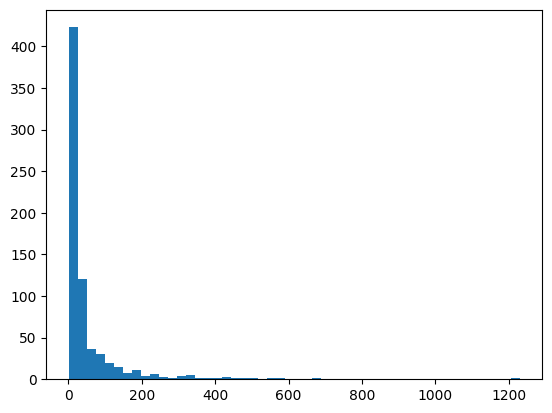

In [15]:
plt.hist(input_lens, bins=50);

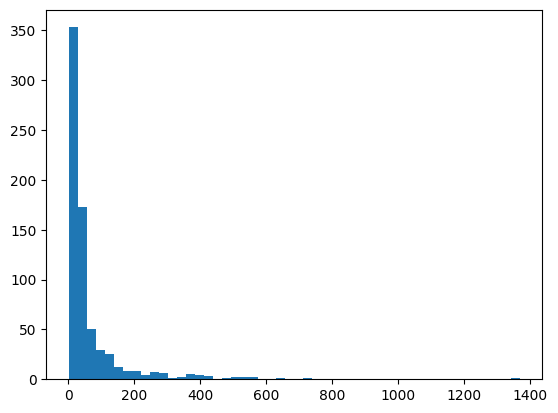

In [16]:
target_lens = [len(t[lan_2]) for t in train]
plt.hist(target_lens, bins=50);

In [17]:
max_input_len = 128
max_target_len = 128

In [18]:
def tokenizer_fn(batch):
    
    inputs = [x[lan_1] for x in batch["translation"]]
    targets = [x[lan_2] for x in batch["translation"]]

    tokenized_input = tokenizer(inputs, max_length=max_input_len, truncation=True)
    tokenized_target = tokenizer(text_target=targets, max_length=max_target_len, truncation=True)

    tokenized_input["labels"] = tokenized_target["input_ids"]
    return tokenized_input

In [19]:
tokenized_dataset = split.map(tokenizer_fn, batched=True, remove_columns=split["train"].column_names)

Map: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 6839.91 examples/s]


In [20]:
# Seq2Seq for Language Model -> LM indica come funziona il decoder
from transformers import AutoModelForSeq2SeqLM
from transformers import DataCollatorForSeq2Seq

In [21]:
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [22]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [23]:
# Ora esploriamo un po'.
samples = [tokenized_dataset["train"][i] for i in range(3)]
batch = data_collator(samples)
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [24]:
batch["labels"]

tensor([[  220,  3111,    34, 11777,  8086,     2,     2,     2,     0,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100],
        [  136,    32, 20556,   668,    31,    30,  7819,    23,   836,   396,
           131, 13829, 18557,   233,  4602,     2,     0],
        [   79,   297,   197,   896, 11669,     0,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100]])

In [25]:
# Possiamo notare che il token 80034 è il token di padding, usato come start del decoder ID
# Possiamo anche vedere come questo output sia lo shift del "label" di una posizione
batch["decoder_input_ids"]

tensor([[80034,   220,  3111,    34, 11777,  8086,     2,     2,     2,     0,
         80034, 80034, 80034, 80034, 80034, 80034, 80034],
        [80034,   136,    32, 20556,   668,    31,    30,  7819,    23,   836,
           396,   131, 13829, 18557,   233,  4602,     2],
        [80034,    79,   297,   197,   896, 11669,     0, 80034, 80034, 80034,
         80034, 80034, 80034, 80034, 80034, 80034, 80034]])

## Metrics

A differenza di altri task, dove le metriche sono ben precise la predizione è catalogabile come corretta o sbagliata, nella traduzione la valutazione di un risultato può essere abbastanza complessa. Questo avviene perchè a differenza di task come POS e NER, possono esiste diverse versioni di traduzione letterale, tuttavia la correttezza dipende da diversi fattori, come il contesto in cui si parla. 
Un altro caso è l'esistenza di parole che sono sinonimi. Ci sono diverse parole che possono essere ok in una traduzione, a differenza delle regole precise della classificazione.

Una delle metriche è il BLEU score, che valuta diversi n-grammi (sequenze di parole) dando un punteggio, da 0 a 1, rispetto alla correttezza.  In precedenza abbiamo usato la libreria nltk per fare queste valutazioni, ma esiste una libreria che supera alcune limitazioni, che è sacrebleu.

Un altra metrica interessante è il BERT score. Paradossalmente, usa un altro modello (BERT) che genera degli embedding di contesto, ovvero dei vettori. Questi vettori vengono comparati usando la cosine-similarity. Si crea, dopo di che, una matrice di confronto tra il target e la predizione, si prende riga per riga il valore massimo di ogni accostamento e si calcola un punteggio come "punteggio massimosu riga" over "totale punteggio della riga".

In [26]:
from evaluate import load
import numpy as np

In [27]:
bleu_metric = load("sacrebleu")
bert_metric = load("bertscore")

In [28]:
bleu_metric.compute(predictions=["I love cats"], references=[["I like cats"]])

{'score': 0.0,
 'counts': [2, 0, 0, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [66.66666666666667, 25.0, 25.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

In [29]:
s = "Marian is an efficient NMT framework written in pure C++"
bleu_metric.compute(predictions=[s], references=[[s]])

{'score': 100.00000000000004,
 'counts': [12, 11, 10, 9],
 'totals': [12, 11, 10, 9],
 'precisions': [100.0, 100.0, 100.0, 100.0],
 'bp': 1.0,
 'sys_len': 12,
 'ref_len': 12}

In [30]:
bert_metric.compute(predictions=["I love cats"], references=[["I like cats"]], lang=lan_1)

C:\Users\emili\Desktop\transformers_course\transformers-env\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\emili\Desktop\transformers_course\transformers-env\Lib\site-packages\transformers\models\roberta\modeling_roberta.py:370: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\

{'precision': [0.9803368449211121],
 'recall': [0.9803368449211121],
 'f1': [0.9803368449211121],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.45.1)'}

In [31]:
"""
Digressione: in teoria, il nostro machine learning model restituisce sempre dei logits. Tuttavia, risalire alla predizione con un logit
diventa molto più complesso nel caso della machine translation a differenza di quanto fatto con NER, POS e sentiment analysis. Ci vuole
un algoritmo più potente, il beam search, che ti permette di risalire poi alla predizione. Noi, tuttavia, stiamo semplificando un po' le cose: stiamo
lasciando ad un modello di machine learning (in coda al modello di linguaggio) l'onere di fornirci direttamente il token id, noi ci limitiamo
a tirare fuori le metriche su questo aspetto.
"""

def compute_metrics(preds_and_labels):
    # qui le predizioni non sono logits, ma token ids
    preds, labels = preds_and_labels
    
    # convertiamo le predizioni e le label in parole
    # NB: qui il tokenizer sa riconoscere il linguaggio automaticamente.
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    # Qui usiamo np.where per cercare nell'array labels, ovunque la label sia -100. Con il terzo valore facciamo un replace con il pad token
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Eliminiamo spazi estra, creiamo le liste di predizioni e le liste di liste di labels per
    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [[label.strip()] for label in decoded_labels]

    bleu = bleu_metric.compute(predictions=decoded_preds, references=decoded_labels)
    bert_score = bert_metric.compute(predictions=decoded_preds, references=decoded_labels, lang=lan_2)

    return {"bleu": bleu["score"], "bert_score":np.mean(bert_score["f1"])}

## Trainer e Training Arguments

In [41]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

In [42]:
training_args = Seq2SeqTrainingArguments(
    "finetuned_ita_model",
    eval_strategy="no", #Faremo la valutazione manualmente, è molto time-consuming. Le predizioni sono MOLTO costose.
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True, # In fase di evaluation, predice le frasi per intero (non step by step confrontando con il ground truth)
    fp16=True # Settiamo la precisione a virgola mobile a mezza precisione, per risparmiare memoria di GPU
)

In [43]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


In [44]:
# Valutazione pre fine-tuning:
trainer.evaluate(max_length=max_target_len)

{'eval_loss': 1.1357285976409912,
 'eval_model_preparation_time': 0.002,
 'eval_bleu': 45.62311555307732,
 'eval_bert_score': 0.8735449284315109,
 'eval_runtime': 319.2803,
 'eval_samples_per_second': 0.94,
 'eval_steps_per_second': 0.016}

In [45]:
# Ora speriamo di reggere
trainer.train()

Step,Training Loss


TrainOutput(global_step=66, training_loss=0.7773808566006747, metrics={'train_runtime': 224.0581, 'train_samples_per_second': 9.373, 'train_steps_per_second': 0.295, 'total_flos': 46860252217344.0, 'train_loss': 0.7773808566006747, 'epoch': 3.0})

In [46]:
trainer.evaluate(max_length=max_target_len)

{'eval_loss': 1.1513553857803345,
 'eval_model_preparation_time': 0.002,
 'eval_bleu': 45.41266516647311,
 'eval_bert_score': 0.8748539902766546,
 'eval_runtime': 288.7122,
 'eval_samples_per_second': 1.039,
 'eval_steps_per_second': 0.017,
 'epoch': 3.0}

In [47]:
trainer.save_model("my_eng_ita_model")

## Inferenza

In [48]:
from transformers import pipeline

In [49]:
translator = pipeline("translation", model="my_eng_ita_model", device=0)

C:\Users\emili\Desktop\transformers_course\transformers-env\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [60]:
def translate(sentence):
    return translator(sentence)[0]["translation_text"]

In [79]:
translate("I hope my model was correctly finetuned and able to translate from english to italian perfectly!")

"Spero che il mio modello sia stato correttamente perfezionato e in grado di tradurre perfettamente dall'inglese all'italiano!"